In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [2]:
def draw_acc(log_file, ax, left=True):
    results = np.atleast_2d(log_file)
    MAC = 306264576
    ann_acc = results[:, 0]
    ann_syn = results[:, 1]
    snn_acc = results[:, 2]/100
    snn_syn = results[:, 3]
    trial = results[:, -1]
    
#     latency_r = np.atleast_2d(np.loadtxt("log_ndt_actual.txt"))
#     snn_acc_latency = latency_r[:, 0]/100
#     snn_syn_latency = latency_r[:, 1]
#     trial_latency = latency_r[:, -1]
    
    i_start = 17
    num_point = 2
    
    ap = 0.35
    x1 = 0.84
    x2 = 0.93
    y1 = 3e7
    y2 = 1e10
    
    if left:
        ax.plot(ann_acc[1:i_start], ann_syn[1:i_start], 'x', color='r', markersize='8', label="ANN: Weights scale")
        ax.plot(snn_acc[1:i_start], snn_syn[1:i_start], 'x', color='b', markersize='8', label="SNN: Weights scale")

        ax.plot(ann_acc[i_start::num_point], ann_syn[i_start::num_point], '.', color='m', label="ANN: SynOp + Quant.")
        ax.plot(ann_acc[i_start+1::num_point], ann_syn[i_start+1::num_point], '.', color='m')
        ax.plot(snn_acc[i_start::num_point], snn_syn[i_start::num_point], 'g.', label="SNN: SynOp + Quant.")
        ax.plot(snn_acc[i_start+1::num_point], snn_syn[i_start+1::num_point], 'g.')
        
        
#         # Plot the latency levels in different color
#         for i_offset in [3, 5, 8]: #range(10):
#             ax.plot(snn_acc_latency[i_offset+290::20], snn_syn_latency[i_offset+290::20], '.', markersize=2, label=f"latency: {i_offset+1}dt")
        
        ax.plot([x1, x1], [y1, y2], 'k--', alpha=0.5)
        ax.plot([x2, x2], [y1, y2], 'k--', alpha=0.5)
        ax.plot([x1, x2], [y1, y1], 'k--', alpha=0.5)
        ax.plot([x1, x2], [y2, y2], 'k--', alpha=0.5)
    
    
        ax.legend(loc="upper left")
        ax.set_xlim(0.1, 1)
        
        ax.set_ylim(1e6, 100e9)
        ax.set_xlabel("Test-set accuracy")
        ax.set_ylabel("Synaptic operations (SynOps)")
        

    if not left:
        ax.plot(ann_acc[1:i_start], ann_syn[1:i_start], 'x', color='r', markersize='8', alpha = ap, label="ANN: Weights scale")
        ax.plot(snn_acc[1:i_start], snn_syn[1:i_start], 'x', color='b', markersize='8', alpha = ap, label="SNN: Weights scale")

        ax.plot(ann_acc[i_start::num_point], ann_syn[i_start::num_point], 'm.', alpha = ap, label="ANN: SynOp + Quant.")
        ax.plot(ann_acc[i_start+1::num_point], ann_syn[i_start+1::num_point], 'm.', alpha = ap)
        ax.plot(snn_acc[i_start::num_point], snn_syn[i_start::num_point], 'g.', alpha = ap, label="SNN: SynOp + Quant.")
        ax.plot(snn_acc[i_start+1::num_point], snn_syn[i_start+1::num_point], 'g.', alpha = ap)
    
    
        ax.grid(True)
        ax.set_xlim(x1, x2)
        ax.set_ylim(y1, y2)
        ax.set_xticks(np.arange(x1, x2, 0.01), minor=True)
        ax.grid(axis='x', markevery=0.01, which='both')
        
        ap=1
        for index_p in [70, 69, 60, 58, 53, 43]:
            ax.plot(snn_acc[index_p], snn_syn[index_p], 'g+', markersize=15)
            a = snn_acc[index_p]
            b = snn_syn[index_p]
            ax.annotate('%.2f%% @ %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
                xytext=(a+0.002, b), textcoords='data',
                horizontalalignment='left', verticalalignment='top', color='g', alpha=ap
            )

        a = 0.9155
        b = 6.18e8
        ax.plot(a, b, 'goldenrod', marker='^', markersize=8)
        ax.annotate('Sengupta et al. 2019\n%.2f%% @ %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a+0.002, b*1.1), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='goldenrod', alpha=ap
        )
        
        a = 0.8487
        b = 4.60e8
        ax.plot(a, b, 'goldenrod', marker='^', markersize=8)
        ax.annotate('Rueckauer et al. 2017\n%.2f%% @ %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a+0.002, b*1.1), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='goldenrod', alpha=ap
        )
        
        a = snn_acc[13]
        b = snn_syn[13]
        ax.plot(a, b, 'b', marker='x', markersize=15)
        ax.annotate('%.2f%% @\n %dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a-0.013, b*1.3), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='b', alpha=ap
        )
        
        a = ann_acc[0]
        b = MAC
        ax.annotate('  %.2f%% @\nMAC=%dM'%(a*100, np.round(b*1e-6)), xy=(a, b),  xycoords='data',
            xytext=(a-0.02, b*1.3), textcoords='data',
            horizontalalignment='left', verticalalignment='top', color='r', alpha=ap
        )
        ax.plot(a, b, 'r*', markersize=15, label="ANN: Original")

    ax.set_yscale('log')
    return results

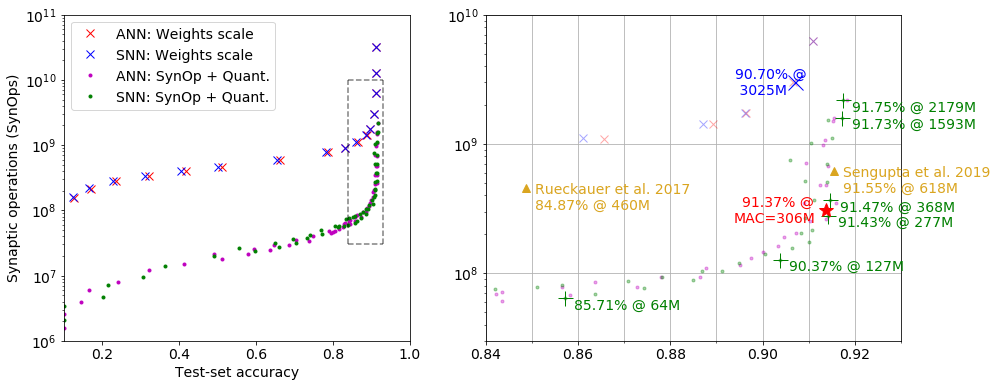

In [4]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2.5, 3]})
f1 = np.loadtxt("log_old.txt")
results = draw_acc(f1, ax[0])
draw_acc(f1, ax[1], False)
plt.savefig("analog_CIFAR_accuracy_Mar24.pdf")

In [6]:
def draw_acc2(ax):
    latency_r = np.atleast_2d(np.loadtxt("log_ndt_actual.txt"))
    snn_acc_latency = latency_r[:, 0]/100
    snn_syn_latency = latency_r[:, 1]
    trial_latency = latency_r[:, -1]
    print(latency_r.shape)
    
    start_index = 25
    color_list = ['b', 'orange', 'r', 'g']
    # Plot the latency levels in different color
    for color_id, i_offset in enumerate([3,5,7,9]): #range(10):
        ax.scatter(snn_acc_latency[i_offset+start_index*10::20], snn_syn_latency[i_offset+start_index*10::20], s=15, c=color_list[color_id], label=f'latency: {i_offset+1}dt')
#         ax.plot(snn_acc_latency[i_offset+start_index*10::20], snn_syn_latency[i_offset+start_index*10::20], '.', markersize=5, label=f'latency: {i_offset+1}dt')
    for i_model in range(start_index, 62, 2):
        ax.plot(snn_acc_latency[i_model*10:(i_model+1)*10], snn_syn_latency[i_model*10:(i_model+1)*10], 'black', linewidth=0.5, alpha=0.5)
    i_model = 62
    ax.plot(snn_acc_latency[i_model*10:(i_model+1)*10], snn_syn_latency[i_model*10:(i_model+1)*10], 'black', linewidth=0.5, alpha=0.5, label="a model tested with various time steps")
    
    ax.set_xlim(0.11, 0.92)

    ax.set_ylim(0.8e7, 2e9)

    ax.legend(loc="upper left")
    ax.set_xlabel("Test-set accuracy")
    ax.set_ylabel("Synaptic operations (SynOps)")
        
    ax.set_yscale('log')
    


(630, 3)


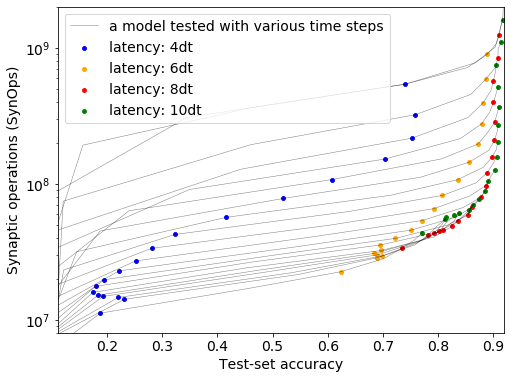

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
draw_acc2(ax)
plt.savefig("analog_CIFAR_latency_model_Mar24.pdf")